In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime
import scipy
import locale
import time
import matplotlib.dates as mdates
locale.getlocale()

('en_US', 'UTF-8')

In [140]:
Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
Variable='TA2_AUT_60@'
StationT=['21235030','21255160','21185090','21115180']#Hacienda Manila
# StationT=['21185090','21255160']
StationT=['21255160']
StationPa=['21235030','23035030']
VariableR='HRA2_AUT_60@'
# VariableR='HRA10_AUT_60@'
VariablePA='PA_60_MEDIA_D@'
VariablePA='PA_60_MX_D@'
VariablePA='PA_60_MN_D@'
T,HR,PA=[],[],[]
def Language(g):
    global tunits,labeltM1,labelTS1,tlabel,runits,vlabel,dlabel,vunits,paunits
    if g=='RU':
        tunits='Температура, °C'
        tunits='Т, °C'
        runits='Относительная влажность, %'
        runits='f, %'
        paunits='гПа'
        labeltM1='WRF'
        labelTS1='наблюдение'  
        tlabel='Время суток'
        dlabel='DV, °'
        vlabel='V'
        vunits='V, м/с'
        locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
    elif g=='EN':
        tunits='Temperature, °C'
        runits='Relative Humidity, %'
        paunits='hPa'
        labeltM1='WRF Data sfc'
        labelTS1='Observation'     
        tlabel='Hour'
        dlabel='Direction'
        vlabel='Wind speed'
        vunits='Wind speed (m/s)'
        #locale.setlocale(locale.LC_TIME,'en_US.utf8')
LANG='RU'
Language(LANG)
for i in StationT:
    T.append(pd.read_csv(Path+Variable+i+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,tunits],index_col=tlabel))
    HR.append(pd.read_csv(Path+VariableR+i+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,runits],index_col=tlabel))
for i in StationPa:
    PA.append(pd.read_csv(Path+VariablePA+i+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,paunits],index_col=tlabel))
    

'21255160'

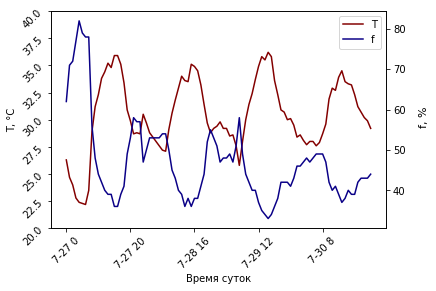

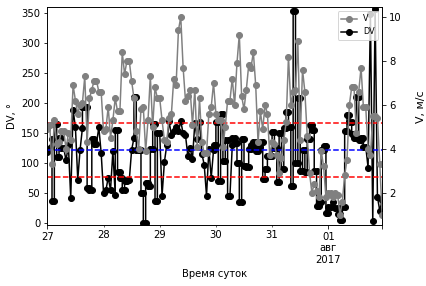

In [141]:
#plotting the same for the next year
#Plotting the day, the day before and after
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2017-07-29'
fig, ax = plt.subplots()
# ax.gray()
ax.yaxis.tick_right()
i=0
####################################################################################
df=T[i]
df['Datetime']=T[i].index
HR[i]['Datetime']=HR[i].index
df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
HR[i]['ticks']=(HR[i]['Datetime'].dt.month).astype(str)+'-'+(HR[i]['Datetime'].dt.day).astype(str) +' '+ (HR[i]['Datetime'].dt.hour).astype(str)
# df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
axis_1=df.loc['2017-07-27':'2017-07-30'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
axis_2=HR[i].loc['2017-07-27':'2017-07-30'].plot(x='ticks',y=HR[i].columns[0],ax=ax,secondary_y = True,color='#0a0087')
ax.tick_params(which='major', labelrotation=45)
ax.set_ylim(20, 40)
ax.set_xlabel(tlabel)
##########################################################################################
ax.text(1.1, 0.51,runits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['f']
axis_1.legend(lines, labels, loc=1)
plt.savefig(patht+'TRHH'+StationT[i]+Date+'.png',bbox_inches='tight')
###############################################################################
#plotting pressure
# PA[0][paunits].loc['2019-08-26':'2019-08-27'].plot()
###############################################################################
Variable='VVMX_AUT_60@'
StationDV='21195170'
V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
StationDV2='21206920'
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# V.sort_values(by='Speed',ascending=False)['2017'].head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'
# StationDV='21206920'
theta=32
StationDV='21195170'
# StationDV='21206920'
StationDV='21206930'# Paramo Guerrero
Variable='VVMX_AUT_60@'
V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V=V.resample('H').last()
Variable='DVMX_AUT_60@'
DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
fig, ax2 = plt.subplots()
axis_1=V.loc['2017-07-27':'2017-08-01'].plot(ax=ax2,secondary_y = True,label='V',marker='o',color='gray')
axis_2=DV.loc['2017-07-27':'2017-08-01'].plot(ax=ax2,label='DV',marker='o',color='black')
ax2.set_ylim(-2, 360)
ax2.text(1.08, 0.66,vunits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
ax2.set_ylabel(dlabel)
ax2.get_legend().remove()
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2

labels = ['V']+ ['DV']
axis_1.legend(lines, labels, loc='upper right',fontsize=8)
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
StationT[0]

'21255160'

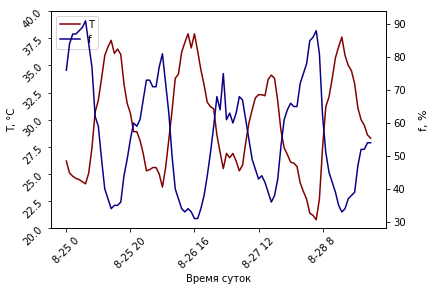

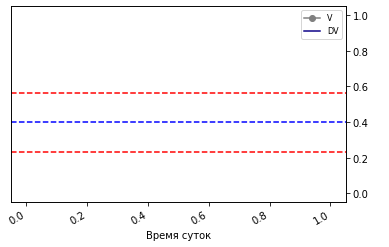

In [147]:
#plotting the same for the next year
#Plotting the day, the day before and after
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2018-08-26'
fig, ax = plt.subplots()
# ax.gray()
ax.yaxis.tick_right()
####################################################################################
df=T[0]
df['Datetime']=T[0].index
HR[0]['Datetime']=HR[0].index
df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
HR[0]['ticks']=(HR[0]['Datetime'].dt.month).astype(str)+'-'+(HR[0]['Datetime'].dt.day).astype(str) +' '+ (HR[0]['Datetime'].dt.hour).astype(str)
# df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
axis_1=df.loc['2018-08-25':'2018-08-28'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
axis_2=HR[0].loc['2018-08-25':'2018-08-28'].plot(x='ticks',y=HR[0].columns[0],ax=ax,secondary_y = True,color='#0a0087')
ax.tick_params(which='major', labelrotation=45)
ax.set_ylim(20, 40)
ax.set_xlabel(tlabel)
##########################################################################################
ax.text(1.1, 0.5,runits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['f']
axis_1.legend(lines, labels, loc=0)
plt.savefig(patht+'TRHH'+StationT[0]+Date+'.png',bbox_inches='tight')
###############################################################################
#plotting pressure
# PA[0][paunits].loc['2019-08-26':'2019-08-27'].plot()
###############################################################################
Variable='VVMX_AUT_60@'
StationDV='21195170'
V=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
StationDV2='21206920'
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2018-08-26':'2018-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# V.sort_values(by='Speed',ascending=False)['2017'].head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'
StationDV='21206920'
theta=32
DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
fig, ax2 = plt.subplots()
axis_1=V.loc['2018-08-25':'2018-08-28'].plot(ax=ax2,secondary_y = True,label='V',marker='o',color='gray')
# axis_2=DV.loc['2018-08-25':'2018-08-28'].plot(ax=ax2,label='DV',marker='o',color='black')
ax2.set_ylim(0, 300)
ax2.text(1.08, 0.66,vunits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
ax2.set_ylabel(dlabel)
ax2.get_legend().remove()
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2

labels = ['V']+ ['DV']
axis_1.legend(lines, labels, loc='upper right',fontsize=8)
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
StationT[0]

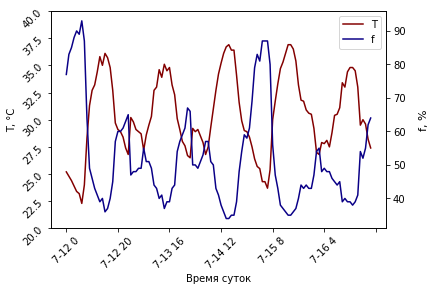

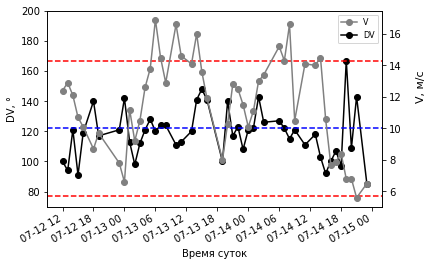

In [148]:
###### ###############################################################################
#14 July 2018
###############################################################################
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2018-07-14'
Language(LANG)
fig, ax = plt.subplots()
ax.yaxis.tick_right()
import datetime as dt
df=T[0]
df['Datetime']=T[0].index
HR[0]['Datetime']=HR[0].index
df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
HR[0]['ticks']=(HR[0]['Datetime'].dt.month).astype(str)+'-'+(HR[0]['Datetime'].dt.day).astype(str) +' '+ (HR[0]['Datetime'].dt.hour).astype(str)
# df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
axis_1=df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
axis_2=HR[0].loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=HR[0].columns[0],ax=ax,secondary_y = True,color='#0a0087')
ax.tick_params(which='major', labelrotation=45)
ax.set_xlabel(tlabel)
ax.set_ylim(20, 40)
ax.text(1.1, 0.5,runits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['f']
axis_1.legend(lines, labels, loc=0)
plt.savefig(patht+'TRHH'+StationT[0]+Date+'.png',bbox_inches='tight')
###############################################################################
Variable='VVMX_AUT_60@'
StationDV='21195170'
StationDV2='21206920'
V=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'#;StationDV='21206920'2
theta=32
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
DV=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
fig, ax2 = plt.subplots()
fig.autofmt_xdate()
ax2.set_ylim(70, 200)
axis_1=V.loc['2018-07-12':'2018-07-14'].plot(ax=ax2,secondary_y = True,ylabel=vlabel,marker='o',color='gray')
axis_2=DV.loc['2018-07-12':'2018-07-14'].plot(ax=ax2,marker='o',color='black')
ax2.text(1.08, 0.66,vunits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
ax2.set_ylabel(dlabel)
ax2.get_legend().remove()
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()


lines = lines_1 + lines_2

labels = ['V']+ ['DV']
axis_1.legend(lines, labels, loc='upper right',fontsize=8)
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
# T[0]['Temperature'].loc['2019-08-26':'2019-08-30'].plot()

# HR[0]['Relative Humidity (%)'].loc['2019-08-26':'2019-08-30'].plot()

'21255160'

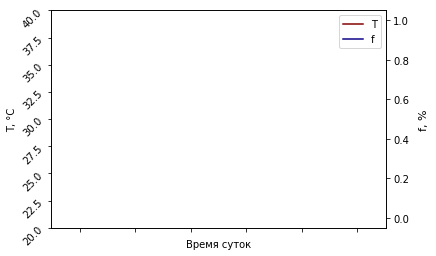

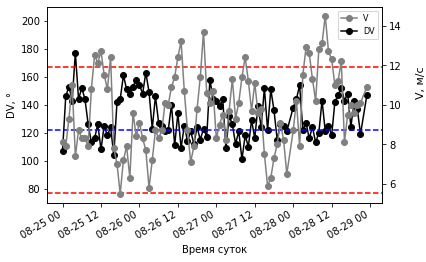

In [144]:
#plotting the same for the next year
#Plotting the day, the day before and after
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2019-08-27'
fig, ax = plt.subplots()
# ax.gray()
ax.yaxis.tick_right()
####################################################################################
df=T[0]
df['Datetime']=T[0].index
HR[0]['Datetime']=HR[0].index
df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
HR[0]['ticks']=(HR[0]['Datetime'].dt.month).astype(str)+'-'+(HR[0]['Datetime'].dt.day).astype(str) +' '+ (HR[0]['Datetime'].dt.hour).astype(str)
# df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
axis_1=df.loc['2019-08-26':'2019-08-28'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
axis_2=HR[0].loc['2019-08-26':'2019-08-28'].plot(x='ticks',y=HR[0].columns[0],ax=ax,secondary_y = True,color='#0a0087')
ax.tick_params(which='major', labelrotation=45)
ax.set_ylim(20, 40)
ax.set_xlabel(tlabel)
##########################################################################################
ax.text(1.1, 0.5,runits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['f']
axis_1.legend(lines, labels, loc=0)
plt.savefig(patht+'TRHH'+StationT[0]+Date+'.png',bbox_inches='tight')
###############################################################################
#plotting pressure
# PA[0][paunits].loc['2019-08-26':'2019-08-27'].plot()
###############################################################################
Variable='VVMX_AUT_60@'
StationDV='21195170'
V=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
StationDV2='21206920'
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# V.sort_values(by='Speed',ascending=False)['2017'].head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'
StationDV='21206920'
theta=32
DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
DV3=DV.loc['2019-08-26 21:00':'2019-08-30 14:00']
V3=V.loc['2019-08-26 21:00':'2019-08-28 14:00']
fig, ax2 = plt.subplots()
axis_1=V.loc['2019-08-25':'2019-08-28'].plot(ax=ax2,secondary_y = True,label='V',marker='o',color='gray')
axis_2=DV.loc['2019-08-25':'2019-08-28'].plot(ax=ax2,label='DV',marker='o',color='black')
ax2.set_ylim(70, 210)
ax2.text(1.08, 0.66,vunits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
ax2.set_ylabel(dlabel)
ax2.get_legend().remove()
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2

labels = ['V']+ ['DV']
axis_1.legend(lines, labels, loc='upper right',fontsize=8)
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
StationT[0]

In [145]:
# #plotting the same for the next year
# #Plotting the day, the day before and after
# patht='/home/usuario/Desktop/imagesTobeerased/'
# Date='2016-06-27'
# fig, ax = plt.subplots()
# # ax.gray()
# ax.yaxis.tick_right()
# i=2
# ####################################################################################
# df=T[i]
# df['Datetime']=T[i].index
# HR[i]['Datetime']=HR[i].index
# df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
# HR[i]['ticks']=(HR[i]['Datetime'].dt.month).astype(str)+'-'+(HR[i]['Datetime'].dt.day).astype(str) +' '+ (HR[i]['Datetime'].dt.hour).astype(str)
# # df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
# axis_1=df.loc['2016-06-26':'2016-06-29'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
# axis_2=HR[i].loc['2016-06-26':'2016-06-29'].plot(x='ticks',y=HR[i].columns[0],ax=ax,secondary_y = True,color='#0a0087')
# ax.tick_params(which='major', labelrotation=45)
# ax.set_ylim(20, 40)
# ax.set_xlabel(tlabel)
# ##########################################################################################
# ax.text(1.1, 0.51,runits,
#           rotation=90, size=11, 
#           ha='left', va='center', transform=ax.transAxes)
# lines_1, labels_1 = axis_1.get_legend_handles_labels()
# lines_2, labels_2 = axis_2.get_legend_handles_labels()
# lines = lines_1 + lines_2
# labels = ['T']+ ['f']
# axis_1.legend(lines, labels, loc=1)
# plt.savefig(patht+'TRHH'+StationT[i]+Date+'.png',bbox_inches='tight')
# ###############################################################################
# #plotting pressure
# # PA[0][paunits].loc['2019-08-26':'2019-08-27'].plot()
# ###############################################################################
# Variable='VVMX_AUT_60@'
# StationDV='21195170'
# V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# StationDV2='21206920'
# V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# # V.sort_values(by='Speed',ascending=False)['2017'].head(20)
# Variable='DVMX_AUT_60@'
# StationDV='21195170'
# # StationDV='21206920'
# theta=32
# StationDV='21195170'
# StationDV='21206920'
# Variable='VVMX_AUT_60@'
# V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# V=V.resample('H').last()
# Variable='DVMX_AUT_60@'
# DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
# fig, ax2 = plt.subplots()
# axis_1=V.loc['2016-06-26 00:00':'2016-06-29 00:00'].plot(ax=ax2,secondary_y = True,label='V',marker='o',color='gray')
# axis_2=DV.loc['2016-06-26':'2016-06-28'].plot(ax=ax2,label='DV',marker='o',color='black')
# ax2.set_ylim(40, 210)
# ax2.text(1.08, 0.66,vunits,
#           rotation=90, size=11, 
#           ha='left', va='center', transform=ax.transAxes)
# ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
# ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
# ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
# ax2.set_ylabel(dlabel)
# ax2.get_legend().remove()
# lines_1, labels_1 = axis_1.get_legend_handles_labels()
# lines_2, labels_2 = axis_2.get_legend_handles_labels()

# lines = lines_1 + lines_2

# labels = ['V']+ ['DV']
# axis_1.legend(lines, labels, loc='upper right',fontsize=8)
# plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
# plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
# StationT[0]

In [146]:

# V.index.datetime.floor('d')
import datetime
# V.index=pd.to_datetime(V.index)
# toremove = V.groupby(V.index.date).head(1).index.strftime('%Y-%m-%d %H:%M')
# # V[~df.index.strftime('%Y-%m-%d %H:%M').isin(toremove)]



# V.loc['2016-06-26':'2016-06-28']

In [132]:
# ###############################################################################

# Variable='VVMX_AUT_60@'
# StationDV2='21195170'
# StationDV='21206920'
# # StationDV2='21235030'
# V=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# # V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# Variable='DVMX_AUT_60@'
# # Variable='DV_AUT_10@'
# StationDV='21195170'#;StationDV='21206920'2
# theta=32
# locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
# DV=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
# fig, ax2 = plt.subplots()
# axis_1=V.loc['2018-08-26':'2018-08-29'].plot(ax=ax2,secondary_y = True,ylabel=vlabel,marker='o',color='gray')
# axis_2=DV.loc['2018-08-26':'2018-08-29'].plot(ax=ax2,marker='o',color='black')
# ax2.text(1.1, 0.5,vunits,
#           rotation=270, size=11, 
#           ha='left', va='center', transform=ax.transAxes)
# ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
# ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
# ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
# ax2.set_ylabel(dlabel)
# ax2.get_legend().remove()
# lines_1, labels_1 = axis_1.get_legend_handles_labels()
# lines_2, labels_2 = axis_2.get_legend_handles_labels()


# lines = lines_1 + lines_2

# labels = ['V']+ ['DV']
# axis_1.legend(lines, labels, loc=0)
# plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
# # T[0]['Temperature'].loc['2019-08-26':'2019-08-30'].plot()
# # HR[0]['Relative Humidity (%)'].loc['2019-08-26':'2019-08-30'].plot()

In [14]:
# #plotting pressure
# PA[0][paunits].loc['2017-07-01':'2017-08-01'].plot(marker='o')
# PA[1][paunits].loc['2017-07-01':'2017-08-01'].plot(marker='o')
# plt.show()

# PA[0][paunits].loc['2018-07-01':'2018-08-01'].plot(marker='o')
# PA[1][paunits].loc['2018-07-01':'2018-08-01'].plot(marker='o')
# plt.show()

# PA[0][paunits].loc['2018-08-01':'2018-09-26'].plot(marker='o')
# PA[1][paunits].loc['2018-08-01':'2018-09-26'].plot(marker='o')
# plt.show()

# PA[0][paunits].loc['2019-08-01':'2019-09-27'].plot(marker='o')
# PA[1][paunits].loc['2019-08-01':'2019-09-27'].plot(marker='o')


In [9]:
labels_1

['V (right)']

In [10]:
# patht='/home/usuario/Desktop/imagesTobeerased/'
# Date='2017-07-28'
# Language(LANG)
# fig, ax = plt.subplots()
# ax.yaxis.tick_right()
# for i in range(len(T)):
#     T[1][tunits].loc['2016-06-26':'2016-06-27'].plot(ax=ax,ylabel=tunits)   
#     HR[1][runits].loc['2016-06-26':'2016-06-27'].plot(ax=ax, secondary_y = True)
# ax.text(1.1, 0.5,runits,
#           rotation=270, size=11, 
#           ha='left', va='center', transform=ax.transAxes)
# plt.savefig(patht+'TRH'+StationT[0]+Date+'.png',bbox_inches='tight')
# StationT[0]  
# T[1].loc['2019-08-29']
# Variable='VVMX_AUT_60@'
# StationDV='21195170'
# V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# StationDV2='21206920'
# V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# # V.sort_values(by='Speed',ascending=False)['2017'].head(20)
# Variable='DVMX_AUT_60@'
# StationDV='21195170'
# #StationDV='21206920'
# theta=32
# locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
# DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
# DV3=DV.loc['2016-06-25 21:00':'2016-06-27 14:00']
# V3=V.loc['2018-07-13 21:00':'2018-07-15 14:00']
# fig, ax2 = plt.subplots()
# V.loc['2016-06-25':'2016-06-27'].plot(ax=ax2,secondary_y = True)
# DV.loc['2016-06-25':'2016-06-27'].plot(ax=ax2)
# ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
# ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
# ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
# # T[0]['Temperature'].loc['2019-08-26':'2019-08-30'].plot()
# # HR[0]['Relative Humidity (%)'].loc['2019-08-26':'2019-08-30'].plot()

In [267]:
# DV3=DV.loc['2019-08-26 21:00':'2019-08-27 14:00']
# V3=V.loc['2019-08-26 21:00':'2019-08-27 14:00']
# from windrose import WindroseAxes
# ax = WindroseAxes.from_ax()
# ax.bar(DV3['Direction'],V3['Speed'], normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()
# ax = WindroseAxes.from_ax()
# ax.box(DV3['Direction'],V3['Speed'], bins=np.arange(0, 8, 1))
# ax.set_legend()
# plt.suptitle('LAT:'+ ' / LON: ')

In [268]:
# patht='/home/usuario/Desktop/imagesTobeerased/'
# Date='2017-07-28'
# Language(LANG)
# fig, ax = plt.subplots()
# ax.yaxis.tick_right()
# for i in range(len(T)):
#     T[1][tunits].loc['2018-08-25':'2018-08-26'].plot(ax=ax,ylabel=tunits)   
#     HR[1][runits].loc['2018-08-25':'2018-08-26'].plot(ax=ax, secondary_y = True)
# ax.text(1.1, 0.5,runits,
#           rotation=270, size=11, 
#           ha='left', va='center', transform=ax.transAxes)
# plt.savefig(patht+'TRH'+StationT[0]+Date+'.png',bbox_inches='tight')
# StationT[0]  
# T[1].loc['2019-08-29']
# Variable='VVMX_AUT_60@'
# StationDV='21195170'
# V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# StationDV2='21206920'
# V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
# V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# # V.sort_values(by='Speed',ascending=False)['2017'].head(20)
# Variable='DVMX_AUT_60@'
# StationDV='21195170'
# #StationDV='21206920'
# theta=32
# locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
# DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
# fig, ax2 = plt.subplots()
# V.loc['2018-08-24':'2018-08-26'].plot(ax=ax2,secondary_y = True)
# DV.loc['2018-08-24':'2018-08-26'].plot(ax=ax2)
# ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
# ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
# ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
# # T[0]['Temperature'].loc['2019-08-26':'2019-08-30'].plot()
# # HR[0]['Relative Humidity (%)'].loc['2019-08-26':'2019-08-30'].plot()

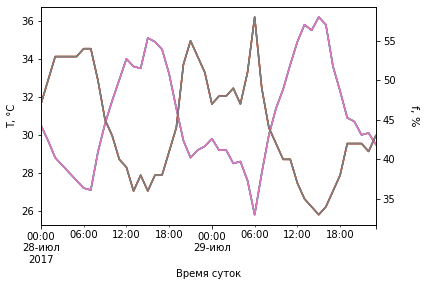

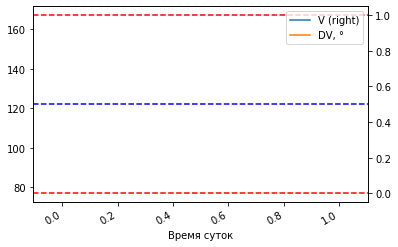

In [93]:
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2017-07-28'
Language(LANG)
fig, ax = plt.subplots()
ax.yaxis.tick_right()
for i in range(len(T)):
    T[1][tunits].loc['2017-07-28':'2017-07-29'].plot(ax=ax,ylabel=tunits)   
    HR[1][runits].loc['2017-07-28':'2017-07-29'].plot(ax=ax, secondary_y = True)
ax.text(1.1, 0.5,runits,
          rotation=270, size=11, 
          ha='left', va='center', transform=ax.transAxes)
plt.savefig(patht+'TRH'+StationT[0]+Date+'.png',bbox_inches='tight')
StationT[0]  
T[1].loc['2019-08-29']
Variable='VVMX_AUT_60@'
StationDV='21195170'
V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
StationDV2='21206920'
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# V.sort_values(by='Speed',ascending=False)['2017'].head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'
StationDV='21206920'
theta=32
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
DV3=DV.loc['2016-06-25 21:00':'2016-06-27 14:00']
V3=V.loc['2018-07-13 21:00':'2018-07-15 14:00']
fig, ax2 = plt.subplots()
V2.loc['2017-07-27':'2017-07-29'].plot(ax=ax2,secondary_y = True)
DV.loc['2017-07-27':'2017-07-29'].plot(ax=ax2)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
# T[0]['Temperature'].loc['2019-08-26':'2019-08-30'].plot()
# HR[0]['Relative Humidity (%)'].loc['2019-08-26':'2019-08-30'].plot()

In [270]:
T[0].loc['2018-07-12':'2018-07-14']


,"Температура, °C"
Время суток,
2018-07-12 00:00:00,24.6
2018-07-12 01:00:00,24.0
2018-07-12 02:00:00,23.1
2018-07-12 03:00:00,22.6
2018-07-12 04:00:00,22.0
...,...
2018-07-14 19:00:00,27.1
2018-07-14 20:00:00,26.4
2018-07-14 21:00:00,25.6


In [271]:
T[0]['2018-07-14':'2018-07-18'].plot(ax=ax)


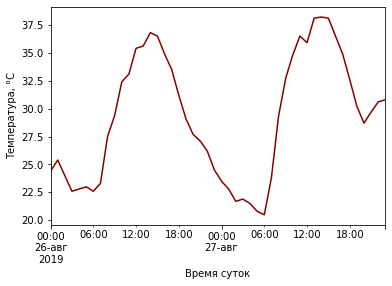

In [272]:
fig, ax = plt.subplots()
# ax.gray()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%H'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%H'))
# ax.yaxis.tick_right()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
axis_1=T[0][tunits].loc['2019-08-26':'2019-08-27'].plot(ax=ax,ylabel=tunits,color='#830000') 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d-%H'))
# x=T[0][tunits].loc['2019-08-26':'2019-08-27'].index
# y=T[0][tunits].loc['2019-08-26':'2019-08-27'].values
# ax.plot(x,y)


In [273]:
# T[0][tunits].loc['2019-08-26':'2019-08-27']
# # T['Datetime'] = T['Datetime'].apply(lambda x: datetime.strftime(x, "%d %H:%M:%S"))
T[0].index[0]

Timestamp('2005-10-06 11:00:00')

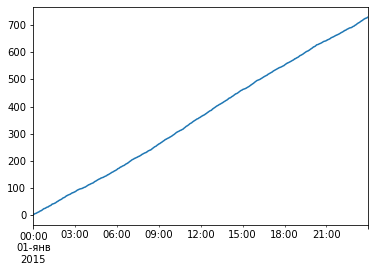

In [217]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import time
import matplotlib.pyplot as plt
import matplotlib.dates as dates
fig, ax = plt.subplots()
df2 = pd.DataFrame({'A' : np.random.rand(1440).cumsum()}, index = pd.date_range('1/1/2015', periods=1440, freq='1min'))
# plt.gca().xaxis.set_major_locator(dates.HourLocator(interval=240))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m:%d:%H'))
ax.set_xticks(df2.index)
df2.A.plot(ax=ax)
plt.show()
t[]

In [221]:
x=T[0].index
# i. for i in x

In [224]:
x[0].datetime.strftime('%H:%M:%S')

AttributeError: 'Timestamp' object has no attribute 'datetime'

In [ ]:
# fig, ax = plt.subplots()
# dfmt = mdates.DateFormatter('%m-%d-%H")
# ax.xaxis.set_major_formatter(dfmt)
# T[0].loc['2018-07-12':'2018-07-14'].plot(ax=ax)
xx=x.strftime('%m:%d:%H')
a=T[0].loc['2018-07-12':'2018-07-14']['xsticks']=T[0].index.strftime('%m:%d:%H')
b=T[0].loc['2018-07-12':'2018-07-14'][T[0].columns[0]].values
plt.plot(a,b)
# T[0].plot(x=T[0].columns[0],y=T[0].columns[1])

'21185090'

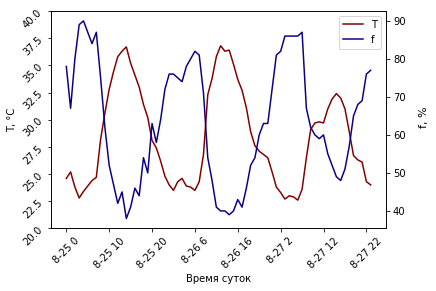

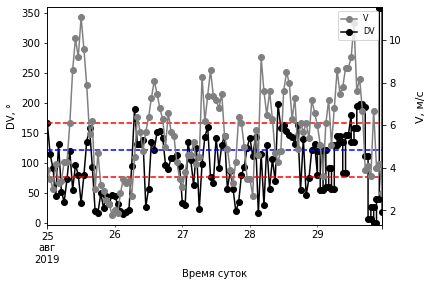

In [138]:
#plotting the same for the next year
#Plotting the day, the day before and after
patht='/home/usuario/Desktop/imagesTobeerased/'
Date='2018-08-26'
fig, ax = plt.subplots()
# ax.gray()
ax.yaxis.tick_right()
i=0
####################################################################################
df=T[i]
df['Datetime']=T[i].index
HR[i]['Datetime']=HR[i].index
df['ticks']=(df['Datetime'].dt.month).astype(str)+'-'+(df['Datetime'].dt.day).astype(str) +' '+ (df['Datetime'].dt.hour).astype(str)
HR[i]['ticks']=(HR[i]['Datetime'].dt.month).astype(str)+'-'+(HR[i]['Datetime'].dt.day).astype(str) +' '+ (HR[i]['Datetime'].dt.hour).astype(str)
# df.loc['2018-07-12':'2018-07-16'].plot(x='ticks',y=df.columns[0])
axis_1=df.loc['2018-08-25':'2018-08-27'].plot(x='ticks',y=df.columns[0],ax=ax,ylabel=tunits,cmap='gray',color='#830000')   
axis_2=HR[i].loc['2018-08-25':'2018-08-27'].plot(x='ticks',y=HR[i].columns[0],ax=ax,secondary_y = True,color='#0a0087')
ax.tick_params(which='major', labelrotation=45)
ax.set_ylim(20, 40)
ax.set_xlabel(tlabel)
##########################################################################################
ax.text(1.1, 0.51,runits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['f']
axis_1.legend(lines, labels, loc=1)
plt.savefig(patht+'TRHH'+StationT[i]+Date+'.png',bbox_inches='tight')
###############################################################################
#plotting pressure
# PA[0][paunits].loc['2019-08-26':'2019-08-27'].plot()
###############################################################################
Variable='VVMX_AUT_60@'
StationDV='21195170'
V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
StationDV2='21206920'
V2=pd.read_csv(Path+Variable+StationDV2+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V.loc['2019-08-26':'2019-08-29'].sort_values(by=vlabel,ascending=False).head(20)
# V.sort_values(by='Speed',ascending=False)['2017'].head(20)
Variable='DVMX_AUT_60@'
StationDV='21195170'
# StationDV='21206920'
theta=32
StationDV='21195170'
# StationDV='21206920'
StationDV='21206930'# Paramo Guerrero
Variable='VVMX_AUT_60@'
V=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,vlabel],index_col=tlabel)
V=V.resample('H').last()
Variable='DVMX_AUT_60@'
DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=[tlabel,dlabel],index_col=tlabel)
fig, ax2 = plt.subplots()
axis_1=V.loc['2019-08-25':'2019-08-29'].plot(ax=ax2,secondary_y = True,label='V',marker='o',color='gray')
axis_2=DV.loc['2019-08-25':'2019-08-29'].plot(ax=ax2,label='DV',marker='o',color='black')
ax2.set_ylim(-2, 360)
ax2.text(1.08, 0.66,vunits,
          rotation=90, size=11, 
          ha='left', va='center', transform=ax.transAxes)
ax2.axhline(y = 77, color = 'r', linestyle = 'dashed')
ax2.axhline(y = 167, color = 'r', linestyle = 'dashed')  
ax2.axhline(y = 122, color = 'b', linestyle = 'dashed')  
ax2.set_ylabel(dlabel)
ax2.get_legend().remove()
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2

labels = ['V']+ ['DV']
axis_1.legend(lines, labels, loc='upper right',fontsize=8)
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
plt.savefig(patht+'VDV'+StationDV+Date+'.png',bbox_inches='tight')
StationT[0]